Implement a simple feedforward neural network on MNIST digit classification.

Experiment with different activation functions and optimizers.

Visualize training loss and accuracy curves.

Try building a CNN for image classification.

Explore transfer learning using pretrained models.

1. Importing libraries and Loading the dataset

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten for dense model
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)


2. Building Feed forward network

In [6]:
def build_ffnn(activation='relu'):
    model = models.Sequential([
        layers.Dense(128, activation=activation, input_shape=(784,)),
        layers.Dense(64, activation=activation),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Example with ReLU + Adam
model = build_ffnn(activation='relu')
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


3. Train and Plot

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8611 - loss: 0.4657 - val_accuracy: 0.9692 - val_loss: 0.1138
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9663 - loss: 0.1161 - val_accuracy: 0.9728 - val_loss: 0.0977
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9753 - loss: 0.0772 - val_accuracy: 0.9748 - val_loss: 0.0822
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9826 - loss: 0.0564 - val_accuracy: 0.9777 - val_loss: 0.0808
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9869 - loss: 0.0402 - val_accuracy: 0.9783 - val_loss: 0.0791
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9885 - loss: 0.0347 - val_accuracy: 0.9757 - val_loss: 0.0842
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9907 - loss: 0.0268 - val_accuracy: 0.9752 - val_loss: 0.0905
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9931 - loss: 0.021

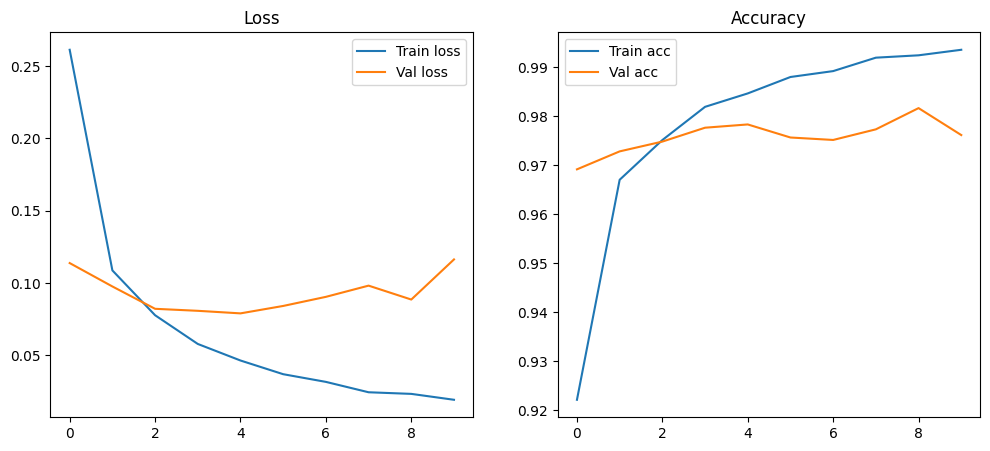

In [7]:
history = model.fit(x_train_flat, y_train, epochs=10, validation_split=0.1)

# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.legend()
plt.title('Accuracy')
plt.show()


4. Saving the Model 

In [8]:
# Save as HDF5 file
model.save('mnist_ffnn_model.h5')

# Alternatively, save as TensorFlow SavedModel
# model.save('mnist_ffnn_model')


5. Model Accuracy

In [9]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9678 - loss: 0.1369
Test Loss: 0.1079
Test Accuracy: 0.9735
